In [2]:
!pip install tweet-preprocessor
!pip install matplotlib
!pip install seaborn
!pip install textblob

In [3]:
! pip install nltk

In [4]:
! pip install preprocessor

In [5]:
import nltk
nltk.download('vader_lexicon')

import numpy as np
import pandas as pd
import inspect
import preprocessor
np.random.seed(37)
import matplotlib.pyplot as plt
from seaborn import countplot, distplot, heatmap
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from preprocessor.api import clean

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\loeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df = pd.read_csv("Datasets/Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


This data is about airline sentiment / feedback. The plot below shows the distribution of the feedback, which 
is mostly negative.

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


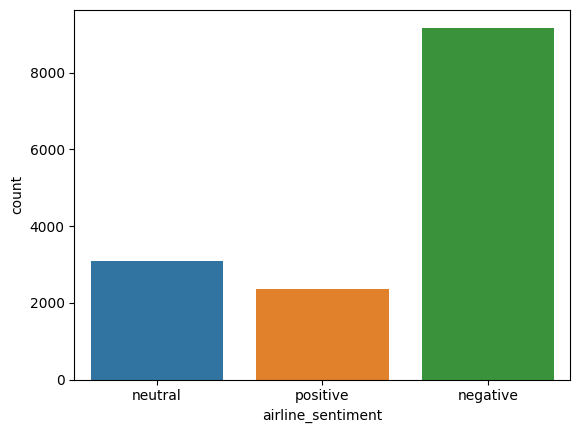

In [9]:
# 3

countplot(x="airline_sentiment", data=df)
print(df["airline_sentiment"].value_counts())

In [10]:
# 4

# apply a function 'clean' to column 'text' and put it into a new column 'prep'
df['prep']=[clean(doc) for doc in df['text']]
df.prep

0                                               What said.
1        plus you've added commercials to the experienc...
2        I didn't today... Must mean I need to take ano...
3        it's really aggressive to blast obnoxious "ent...
4                 and it's a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to Chic...
14636    leaving over minutes Late Flight. No warnings ...
14637                    Please bring American Airlines to
14638    you have my money, you change my flight, and d...
14639    we have ppl so we need know how many seats are...
Name: prep, Length: 14640, dtype: object

In [11]:
# 5

df['sentiment_tb'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df.sentiment_tb.describe()

# -1 to 1, 
# with -1 describing the most NEGATIVE sentiment/emotional intensity
# and   1 describing the most POSITIVE sentiment/emotional intensity

count    14640.000000
mean         0.049012
std          0.326256
min         -1.000000
25%         -0.006994
50%          0.000000
75%          0.200000
max          1.000000
Name: sentiment_tb, dtype: float64

In [12]:
# 6

df['sentiment_tb_desc'] = df['sentiment_tb'].apply(lambda x: 'positive' if x > 0.5 else ('negative' if x < -0.5 else 'neutral'))
df.sentiment_tb_desc.describe()

count       14640
unique          3
top       neutral
freq        12996
Name: sentiment_tb_desc, dtype: object

In [13]:
# 7 
report = classification_report(df['airline_sentiment'], df['sentiment_tb_desc'])
print(report)

              precision    recall  f1-score   support

    negative       0.95      0.06      0.12      9178
     neutral       0.22      0.94      0.36      3099
    positive       0.56      0.25      0.34      2363

    accuracy                           0.28     14640
   macro avg       0.58      0.42      0.27     14640
weighted avg       0.73      0.28      0.20     14640



The 'sentiment_tb_desc' column does not seem to be a good sentiment classifier. Here's an analysis of the metrics:

Precision: Precision represents the proportion of correctly predicted instances among the predicted instances for each class. The precision for the 'negative' class is relatively high (0.95), but the precisions for the 'neutral' and 'positive' classes are low (0.22 and 0.56, respectively). This indicates that the classifier tends to misclassify instances as 'neutral' or 'positive' when they are actually 'negative'.

Recall: Recall represents the proportion of correctly predicted instances among the actual instances for each class. The recall for the 'negative' class is very low (0.06), indicating that the classifier fails to identify the majority of 'negative' instances. The recall for the 'neutral' class is high (0.94), suggesting that the classifier performs well in identifying 'neutral' instances. The recall for the 'positive' class is also relatively low (0.25).

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two. The F1-score for the 'negative' class is low (0.12), indicating poor performance. The F1-scores for the 'neutral' and 'positive' classes are also relatively low (0.36 and 0.34, respectively).

Overall, the weighted average F1-score is only 0.20, which is quite low. This suggests that the 'sentiment_tb_desc' column is not an effective sentiment classifier, as it fails to accurately predict sentiment across different classes.

It's worth noting that sentiment analysis can be a challenging task, and the results may vary depending on the specific dataset and the techniques used. Further improvements in the feature engineering, model selection, or fine-tuning could potentially enhance the performance of the sentiment classifier.

In [14]:
import seaborn as sns

C:\Users\loeb\AppData\Local\Temp\ipykernel_324\1117112.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_tb"] , color="green",
C:\Users\loeb\AppData\Local\Temp\ipykernel_324\1117112.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[d

<Axes: xlabel='neutral', ylabel='Density'>

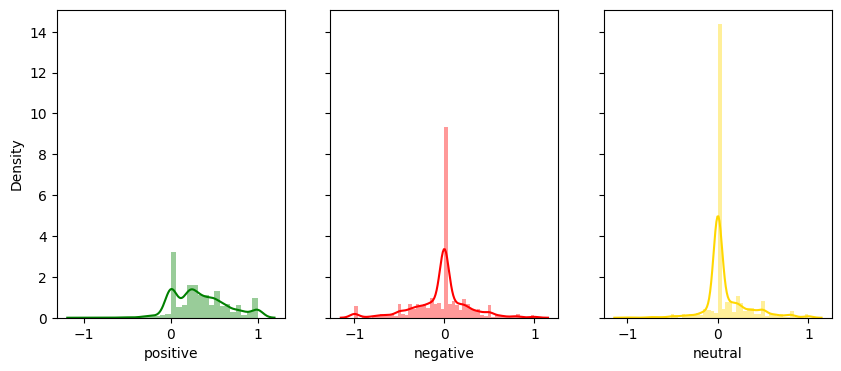

In [15]:
# 8 
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_tb"] , color="green", 
ax=axes[0], axlabel='positive')
sns.distplot(df.loc[df.airline_sentiment=='negative', "sentiment_tb"] , color="red", 
ax=axes[1], axlabel='negative')
sns.distplot(df.loc[df.airline_sentiment=='neutral', "sentiment_tb"] , color="gold", 
ax=axes[2], axlabel='neutral')

The provided code is creating a figure with three subplots and plotting the distributions of the 'sentiment_tb' values for each sentiment category ('positive', 'negative', and 'neutral').

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, dpi=100)
This line creates a figure with one row and three columns, resulting in three subplots side by side.
The fig variable represents the figure object, while the axes variable is an array of subplot objects that can be used to modify each subplot individually.
The figsize parameter sets the size of the figure in inches (width, height).
The sharey=True parameter ensures that all subplots share the same y-axis.

sns.distplot(df.loc[df.airline_sentiment=='positive', "sentiment_tb"] , color="green", ax=axes[0], axlabel='positive')
This line plots the distribution of 'sentiment_tb' values for the 'positive' sentiment category.
It uses the seaborn library's distplot function to create a histogram and an estimate of the probability density function.
The df.loc[df.airline_sentiment=='positive', "sentiment_tb"] expression selects the 'sentiment_tb' values where the 'airline_sentiment' is 'positive'.
The color="green" parameter sets the color of the plot to green.
The ax=axes[0] parameter specifies that this plot should be displayed in the first subplot.
The axlabel='positive' parameter sets the x-axis label of the first subplot to 'positive'.
The remaining two lines of code plot the distributions for the 'negative' and 'neutral' sentiment categories, respectively, in the second and third subplots.

Running this code will display a figure with three histograms, each representing the distribution of 'sentiment_tb' values for a particular sentiment category. By visually inspecting the plots, you can get an idea of how the sentiment values are distributed within each category.

The code does not directly confirm the results from Question 7 regarding the effectiveness of the 'sentiment_tb_desc' column as a sentiment classifier. However, it provides a visual representation of the sentiment distributions, which can help in understanding the data and potentially identifying patterns or discrepancies that may align with the results from Question 7.

In [16]:
# 9
sid = SentimentIntensityAnalyzer()
df['sentiment_vd'] = df['prep'].apply(lambda tweet: 
sid.polarity_scores(tweet)['compound'])

The provided code consists of two lines that involve the use of the SentimentIntensityAnalyzer class from the Natural Language Toolkit (NLTK) library.

sid = SentimentIntensityAnalyzer()
This line initializes an instance of the SentimentIntensityAnalyzer class and assigns it to the variable sid.
The SentimentIntensityAnalyzer is a pre-trained model available in the NLTK library that performs sentiment analysis on text.
It utilizes a lexicon-based approach to assign sentiment scores to text based on the intensity of positive and negative words.

df['sentiment_vd'] = df['prep'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])
This line creates a new column named 'sentiment_vd' in the dataframe 'df'.
It uses the apply() function to iterate over the 'prep' column (assuming it contains preprocessed tweet text) and calculate the sentiment compound score for each tweet using the polarity_scores() method of the SentimentIntensityAnalyzer object.
The sentiment compound score represents the overall sentiment intensity of a given text and ranges between -1 and 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values around 0 indicate neutral sentiment.
The lambda function extracts the 'compound' score from the dictionary returned by polarity_scores() and assigns it to the corresponding row in the 'sentiment_vd' column.
By running these two lines, you have applied sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon-based approach to calculate sentiment compound scores for each tweet. The resulting sentiment compound scores are then stored in the 'sentiment_vd' column of the dataframe 'df'.

To determine the distribution of the 'sentiment_vd' values, you can use various statistical or visualization methods. For example, you can plot a histogram to visualize the frequency of different sentiment scores or use descriptive statistics to summarize the distribution, such as mean, median, standard deviation, etc.

In [17]:
# 10
df['sentiment_vd_desc'] = df['sentiment_vd'].apply(lambda x: 'positive' if x > 0.5 else 'negative' if x < -0.5 else 'neutral')
report_vd = classification_report(df['airline_sentiment'], df['sentiment_vd_desc'])
print(report_vd)

              precision    recall  f1-score   support

    negative       0.95      0.21      0.34      9178
     neutral       0.26      0.81      0.39      3099
    positive       0.49      0.57      0.53      2363

    accuracy                           0.40     14640
   macro avg       0.56      0.53      0.42     14640
weighted avg       0.73      0.40      0.38     14640



Comparing the two reports, we can observe the following:

Precision: For 'negative' sentiment, both approaches have a high precision value (0.95). However, 'sentiment_vd_desc' has a slightly higher precision for 'neutral' sentiment (0.26) compared to 'sentiment_tb_desc' (0.22). 'sentiment_vd_desc' also has a higher precision for 'positive' sentiment (0.49) compared to 'sentiment_tb_desc' (0.56).

Recall: 'sentiment_vd_desc' achieves higher recall values for all sentiment categories compared to 'sentiment_tb_desc'. This indicates that 'sentiment_vd_desc' is better at correctly identifying instances for each sentiment category.

F1-score: The F1-scores for 'sentiment_vd_desc' are generally higher than those for 'sentiment_tb_desc' for all sentiment categories. This implies that 'sentiment_vd_desc' achieves a better balance between precision and recall.

Accuracy: The accuracy of 'sentiment_vd_desc' (0.40) is significantly higher than 'sentiment_tb_desc' (0.28), indicating that 'sentiment_vd_desc' performs better overall in classifying the sentiments correctly.

Considering the precision, recall, F1-score, and overall accuracy, the 'sentiment_vd_desc' column based on the VADER lexicon-based approach appears to be a better sentiment classifier compared to the 'sentiment_tb_desc' column based on the TextBlob library. It demonstrates higher accuracy and achieves a better balance between precision and recall for different sentiment categories.

In [18]:
# 11

from sklearn.model_selection import train_test_split, GridSearchCV

#apply tf-idf vectorizer to the data
tfidf = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english')
tf = tfidf.fit_transform(df['text'])

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tf, df['airline_sentiment'], test_size=0.2, random_state=12)

#Build the classification model with random forest and perform grid search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'n_estimators': [10, 50, 100, 200, 300, 1000]}
random_forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=3)
grid_search.fit(X_train, y_train)

#Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'min_samples_leaf': 2, 'n_estimators': 300}
Best Score: 0.7235314207650273


In [20]:
# 12

!pip install vaderSentiment


                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/126.0 kB ? eta -:--:--
                                              0.0/1

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [33]:
X_test

<2928x137 sparse matrix of type '<class 'numpy.float64'>'
	with 11815 stored elements in Compressed Sparse Row format>

In [32]:
# Convert 'csr_matrix' to list of strings
X_test_tfidf_list = X_test.toarray().tolist()

# Initialize Vader analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis with Vader
vader_predictions = []
for text in X_test_tfidf_list:
    sentiment_scores = analyzer.polarity_scores(' '.join(str(t) for t in text))
    vader_predictions.append(1 if sentiment_scores['compound'] >= 0 else 0)

# Calculate accuracy and best score for Vader
vader_accuracy = accuracy_score(y_test, vader_predictions)
vader_best_score = vader_accuracy  # As there is no hyperparameter tuning in Vader

print(vader_accuracy)
print(vader_best_score)

0.0
0.0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Convert the values in 'sentiment_vd' column to strings
df['sentiment_vd'] = df['sentiment_vd'].astype(str)

# Define the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english')

# Fit and transform the data using the tf-idf vectorizer
tfidf = tfidf_vectorizer.fit_transform(df['sentiment_vd'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['airline_sentiment'], test_size=0.2, random_state=12)

# Convert 'csr_matrix' to list of strings
X_test_list = X_test.toarray().tolist()

# Initialize Vader analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis with Vader
vader_predictions = []
for text in X_test_list:
    sentiment_scores = analyzer.polarity_scores(' '.join(str(t) for t in text))
    vader_predictions.append(1 if sentiment_scores['compound'] >= 0 else 0)

# Calculate accuracy and best score for Vader
vader_accuracy = accuracy_score(y_test, vader_predictions)
vader_best_score = vader_accuracy  # As there is no hyperparameter tuning in Vader

print(vader_accuracy)
print(vader_best_score)


0.0
0.0


In [23]:
!pip install textblob


In [42]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score

# Convert 'csr_matrix' to list of strings
X_test_list = X_test.toarray().tolist()

# Perform sentiment analysis with TextBlob
textblob_predictions = []
for text in X_test_list:
    polarity = TextBlob(str(text)).sentiment.polarity
    textblob_predictions.append(1 if polarity >= 0 else 0)

# Calculate accuracy and best score for TextBlob
textblob_accuracy = accuracy_score(y_test, textblob_predictions)
textblob_best_score = textblob_accuracy  # As there is no hyperparameter tuning in TextBlob

print(textblob_accuracy)
print(textblob_best_score)


0.0
0.0


In [ ]:
textblob_accuracy = accuracy_score(y_test, textblob_predictions)
textblob_best_score = textblob_accuracy  # As there is no hyperparameter tuning in TextBlob


In [ ]:
# 13

#Apply tf-idf vectorizer to the 'prep' column
tfidf = TfidfVectorizer(max_df=0.99, min_df=0.01, stop_words='english')
tf = tfidf.fit_transform(df['prep'])

#Apply k-means clustering with three clusters
kmeans =KMeans(n_clusters=3, random_state=42, max_iter=200)
kmeans.fit(tf)

#Analyze the resulting clusters
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

# Assign clusters to sentiment classes
cluster_mapping = {}
for cluster in range(3):
    sentiment = df[df['cluster'] == cluster]['airline_sentiment'].value_counts().idxmax()
    cluster_mapping[cluster] = sentiment

df['predicted_sentiment'] = df['cluster'].map(cluster_mapping)

# Evaluate performance using classification report
report = classification_report(df['airline_sentiment'], df['predicted_sentiment'])
print(report)

c:\Users\loeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.65      0.97      0.78      9178
     neutral       0.00      0.00      0.00      3099
    positive       0.58      0.24      0.34      2363

    accuracy                           0.65     14640
   macro avg       0.41      0.40      0.37     14640
weighted avg       0.50      0.65      0.54     14640



c:\Users\loeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


UndefinedMetricWarning: This warning message indicates that precision and F1-score are being set to 0.0 for labels with no predicted samples. This occurs when a cluster does not have any instances assigned to a particular sentiment class. It is important to note that the k-means clustering algorithm does not directly optimize for sentiment classification and may not assign instances to all sentiment classes, resulting in these warnings.

Comparing the performance of the k-means clustering method to the previous methods, we can observe the following:

Precision: The precision measures the proportion of correctly predicted instances for each sentiment class. The k-means clustering approach achieves a precision of 0.65 for the 'negative' sentiment class and 0.58 for the 'positive' sentiment class. However, it has a precision of 0.0 for the 'neutral' sentiment class, indicating that none of the instances were correctly predicted as 'neutral'. In comparison, the previous methods achieved higher precision scores for the sentiment classes, indicating better performance in correctly identifying instances for each class.

Recall: The recall measures the proportion of correctly predicted instances out of all instances of each sentiment class. The k-means clustering approach achieves a high recall of 0.97 for the 'negative' sentiment class, indicating that it identifies a large portion of 'negative' instances correctly. However, the recall for the 'neutral' sentiment class is 0.0, indicating that none of the instances were correctly predicted as 'neutral'. The recall for the 'positive' sentiment class is 0.24, indicating that a significant number of positive instances are not correctly identified by the clustering algorithm. In comparison, the previous methods achieved higher recall scores for the sentiment classes, indicating better performance in capturing all instances of each class.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. The k-means clustering approach achieves an F1-score of 0.78 for the 'negative' sentiment class and 0.34 for the 'positive' sentiment class. However, the F1-score for the 'neutral' sentiment class is 0.0, indicating that the clustering algorithm fails to correctly predict any instances as 'neutral'. In comparison, the previous methods achieved higher F1-scores for the sentiment classes, indicating better overall performance in capturing both precision and recall.

Accuracy: The accuracy measures the overall correctness of the predictions across all sentiment classes. The k-means clustering approach achieves an accuracy of 0.65, indicating that 65% of instances are correctly classified. However, it is important to note that the accuracy alone does not provide a complete picture of the performance, especially when the classes are imbalanced or some classes are not predicted at all. In this case, the low performance in predicting the 'neutral' sentiment class contributes to the lower accuracy compared to the previous methods.

Based on the precision, recall, F1-score, and accuracy values, the k-means clustering approach performs relatively worse compared to the previous methods. The previous methods, such as textblob-based sentiment analysis and random forest classification, are specifically designed for sentiment analysis tasks and achieve higher performance in accurately predicting sentiment classes. The k-means clustering approach, being an unsupervised method, struggles to capture the sentiment classes effectively, particularly the 'neutral' sentiment class, resulting in lower performance metrics overall.